<a href="https://colab.research.google.com/github/firminkaman/MonProjet1/blob/main/TP_CONTROLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# Firmin Kaman TP CONTROLE
# Importations nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score

chargement des données

In [90]:
# Charger les données de régression (California housing)
california_housing = fetch_california_housing()

# Charger les données de classification (Iris)
iris = load_iris()

1. importer le dataset Iris
à l'aide de la fonction `load_iris()` du module `sklearn.datasets`. Les données
sont ensuite assignées aux variables `X_cls` pour les caractéristiques et `y_cls`
pour les étiquettes de classe.
2. diviser les données de l'Iris dataset en ensembles d'entraînement et de test
en utilisant la fonction `train_test_split()` du module `sklearn.model_selection`.
Un ratio de test de 20 % est spécifié, et la division est effectuée en fixant la
valeur `random_state` à 42 pour assurer la reproductibilité.

In [91]:
# Préparation des données pour la régression
X_reg, y_reg = california_housing.data, california_housing.target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [92]:
# Préparation des données pour la classification
X_cls, y_cls = iris.data, iris.target
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

Exploration des Data sets

In [93]:
# Afficher les informations sur le dataset California housing
print("Informations sur le dataset California housing :")
print(california_housing.DESCR)

Informations sur le dataset California housing :
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands

In [94]:
# Afficher les informations sur le dataset Iris
print("Informations sur le dataset Iris :")
print(iris.DESCR)

Informations sur le dataset Iris :
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== 

In [95]:
# Afficher les colonnes du dataset California housing
print("Colonnes du dataset California housing :")
print(california_housing.feature_names)

Colonnes du dataset California housing :
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [96]:
# Afficher les colonnes du dataset Iris
print("Colonnes du dataset Iris :")
print(iris.feature_names)

Colonnes du dataset Iris :
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [97]:
# Afficher les éléments vides dans le DataFrame (pour le dataset Iris)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print("Éléments vides dans le DataFrame Iris :")
print(iris_df.isnull().sum())

Éléments vides dans le DataFrame Iris :
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [98]:
# Créer un DataFrame à partir du dataset California housing
california_housing_df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Afficher les éléments vides dans le DataFrame du dataset California housing
print(california_housing_df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [99]:
print("Statistiques importantes pour le dataset Iris :")
print(iris_df.describe())

Statistiques importantes pour le dataset Iris :
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [100]:
# Statistiques importantes pour la compréhension du dataset California housing
print("Statistiques importantes pour le dataset California housing :")
print(california_housing_df.describe())


Statistiques importantes pour le dataset California housing :
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32

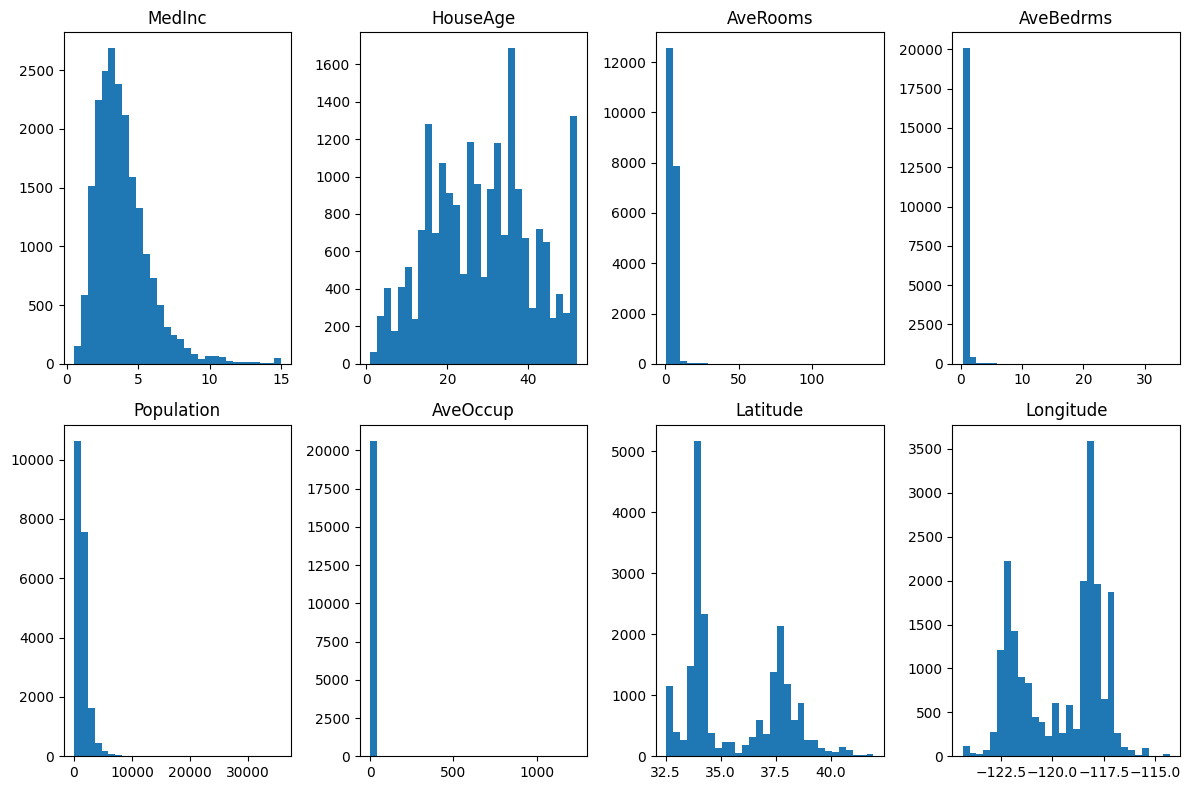

In [101]:
# Histogrammes des caractéristiques du dataset California housing
plt.figure(figsize=(12, 8))
for i, feature in enumerate(california_housing.feature_names):
    plt.subplot(2, 4, i+1)
    plt.hist(X_reg[:, i], bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

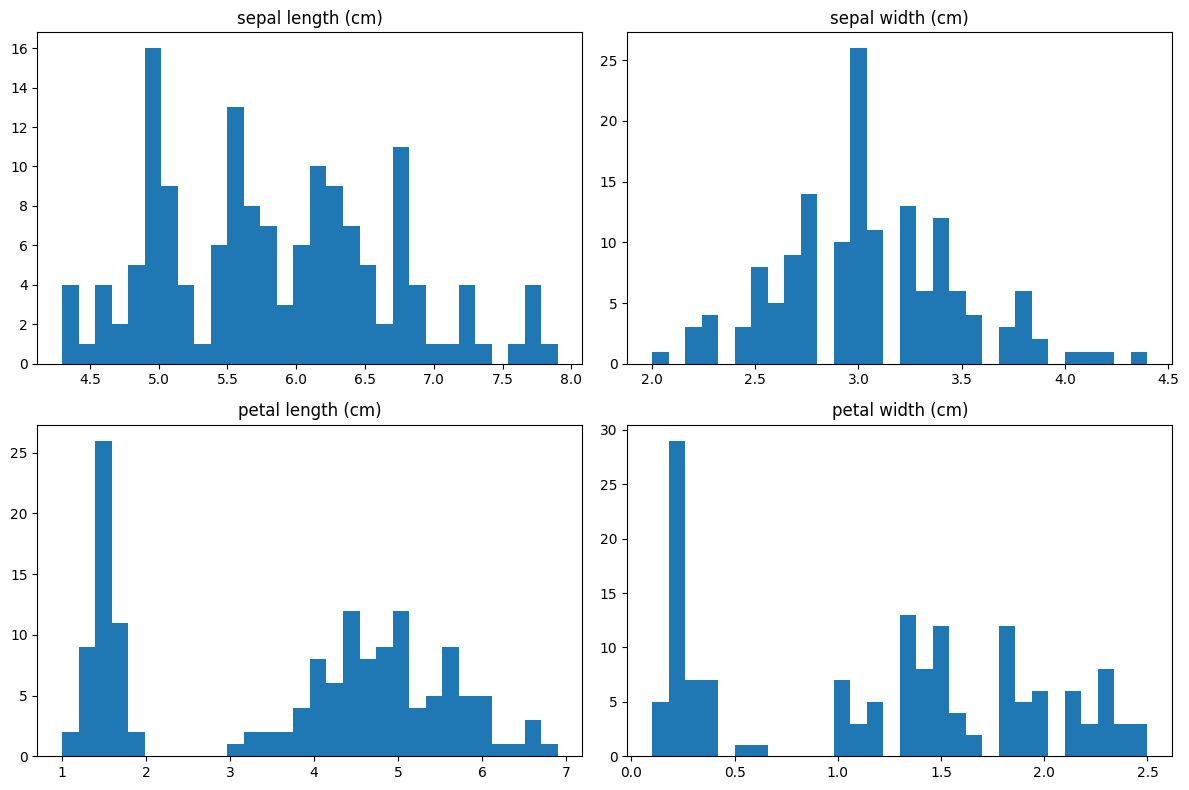

In [102]:
# Affichage des histogrammes pour chaque caractéristique du dataset Iris
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    plt.hist(X_cls[:, i], bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

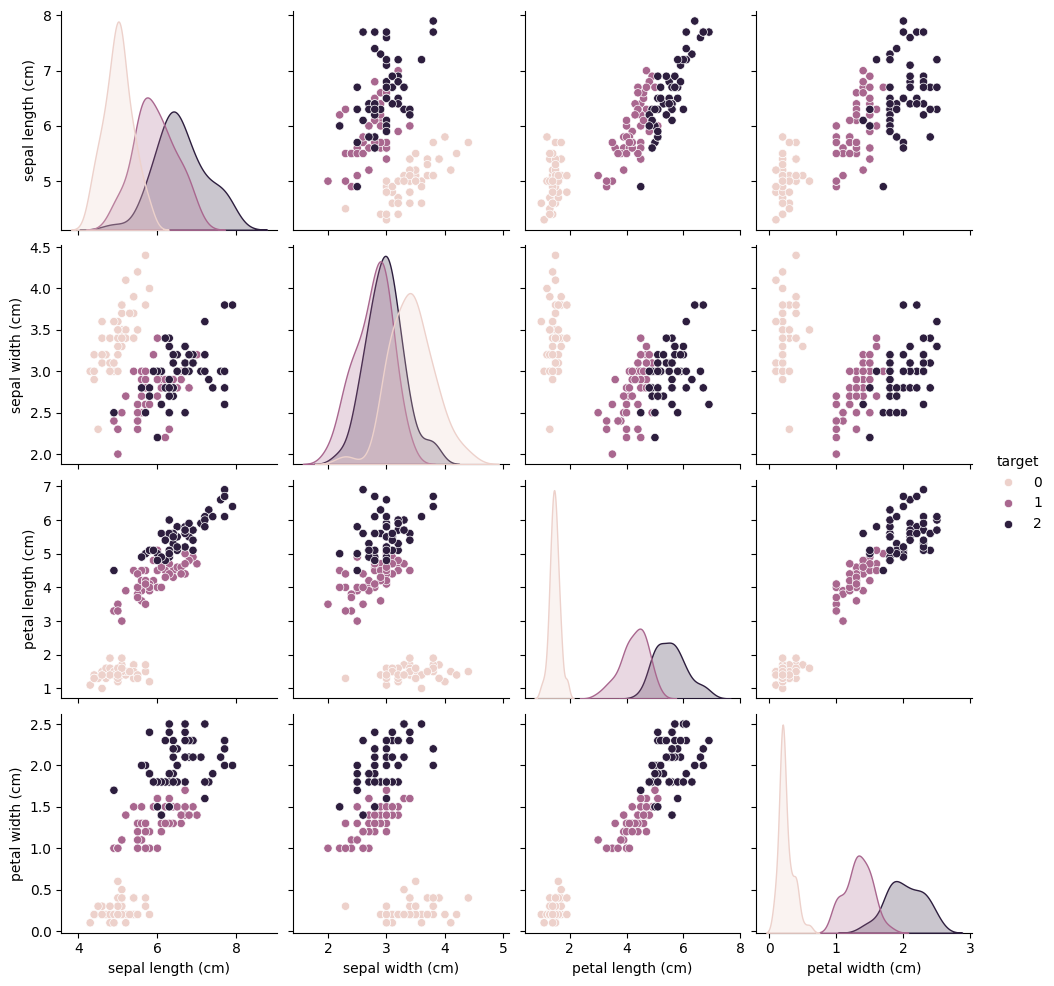

In [103]:
# Nuage de points pour les caractéristiques du dataset Iris
plt.figure(figsize=(12, 8))
sns.pairplot(iris_df, hue='target')
plt.show()

3. normaliser les données avant d'être utilisées dans les modèles
en utilisant `StandardScaler()` du module `sklearn.preprocessing`. Deux scalers
sont créés pour les ensembles de régression et de classification, puis appliqués
respectivement aux ensembles d'entraînement et de test.

In [104]:
# Créer deux scalers pour les ensembles de régression et de classification
scaler_reg = StandardScaler()
scaler_cls = StandardScaler()

# Normaliser les données d'entraînement et de test pour la régression
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Normaliser les données d'entraînement et de test pour la classification
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)


4. appliquer les modèles de régression
kNN (k-Nearest Neighbors), Decision Tree (Arbre de décision) et Random Forest
(Forêt aléatoire).
6. appliquer la métrique de performance pour évaluer les modèles de
régression
l'erreur quadratique moyenne (MSE - Mean Squared Error).


In [105]:
# kNN Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_knn_reg = knn_reg.predict(X_test_reg_scaled)
mse_knn_reg = mean_squared_error(y_test_reg, y_pred_knn_reg)
print("MSE for kNN Regressor:", mse_knn_reg)


MSE for kNN Regressor: 0.4324216146043236


In [106]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_dt_reg = dt_reg.predict(X_test_reg_scaled)
mse_dt_reg = mean_squared_error(y_test_reg, y_pred_dt_reg)
print("MSE for Decision Tree Regressor:", mse_dt_reg)

MSE for Decision Tree Regressor: 0.49234051305159887


In [107]:
# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg_scaled)
mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
print("MSE for Random Forest Regressor:", mse_rf_reg)

MSE for Random Forest Regressor: 0.2541725491869243


5. Utiliser les modèles de classification
SVM (Support Vector Classifier), kNN (k-Nearest Neighbors), Decision Tree
(Arbre de décision) et Random Forest (Forêt aléatoire).
7. appliquer la métrique de performance pour évaluer les modèles de
classification
la précision (Accuracy).

In [108]:
# SVM Classifier
svm_cls = SVC()
svm_cls.fit(X_train_cls_scaled, y_train_cls)
y_pred_svm_cls = svm_cls.predict(X_test_cls_scaled)
accuracy_svm_cls = accuracy_score(y_test_cls, y_pred_svm_cls)
print("Accuracy for SVM Classifier:", accuracy_svm_cls)

Accuracy for SVM Classifier: 1.0


In [109]:
# kNN Classifier
knn_cls = KNeighborsClassifier()
knn_cls.fit(X_train_cls_scaled, y_train_cls)
y_pred_knn_cls = knn_cls.predict(X_test_cls_scaled)
accuracy_knn_cls = accuracy_score(y_test_cls, y_pred_knn_cls)
print("Accuracy for kNN Classifier:", accuracy_knn_cls)

Accuracy for kNN Classifier: 1.0


In [110]:
# Random Forest Classifier
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train_cls_scaled, y_train_cls)
y_pred_rf_cls = rf_cls.predict(X_test_cls_scaled)
accuracy_rf_cls = accuracy_score(y_test_cls, y_pred_rf_cls)
print("Accuracy for Random Forest Classifier:", accuracy_rf_cls)

Accuracy for Random Forest Classifier: 1.0


6. appliquer la métrique de performance pour évaluer les modèles de
régression
l'erreur quadratique moyenne (MSE - Mean Squared Error).

In [111]:
# kNN Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_knn_reg = knn_reg.predict(X_test_reg_scaled)
mse_knn_reg = mean_squared_error(y_test_reg, y_pred_knn_reg)
print("MSE for kNN Regressor:", mse_knn_reg)

MSE for kNN Regressor: 0.4324216146043236


8. utiliser un algorithme non supervisé
`KMeans` du module `sklearn.cluster` avec 3 clusters

In [112]:


# Création du modèle KMeans avec 3 clusters
kmeans_california = KMeans(n_clusters=3, random_state=42)

# Entraînement du modèle sur les données California housing
kmeans_california.fit(X_train_reg_scaled)

# Prédictions des clusters pour les données California housing
clusters_california = kmeans_california.predict(X_test_reg_scaled)

# Affichage des résultats
print("Clusters générés par KMeans sur le dataset California housing :")
print(clusters_california)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters générés par KMeans sur le dataset California housing :
[0 0 1 ... 1 1 0]


In [113]:
# Création du modèle KMeans avec 3 clusters
kmeans_iris = KMeans(n_clusters=3, random_state=42)

# Entraînement du modèle sur les données Iris
kmeans_iris.fit(X_train_cls_scaled)

# Prédictions des clusters pour les données Iris
clusters_iris = kmeans_iris.predict(X_test_cls_scaled)

# Affichage des résultats
print("Clusters générés par KMeans sur le dataset Iris :")
print(clusters_iris)

Clusters générés par KMeans sur le dataset Iris :
[2 0 1 2 1 0 2 1 2 2 1 0 0 0 0 1 1 2 2 1 0 2 0 1 1 1 1 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pour la partie Régression :
1.	Caractéristiques des données utilisées pour la régression : Les données utilisées pour la régression sont des caractéristiques socio-économiques de différents blocs en Californie, telles que le revenu médian, l'âge médian des maisons, le nombre moyen de pièces et de chambres par ménage, etc.
2.	Objectif de la tâche de régression dans ce TP : L'objectif de la tâche de régression est de prédire la valeur médiane des maisons dans différents blocs en Californie en fonction de leurs caractéristiques socio-économiques.
3.	Modèles de régression utilisés : Trois modèles de régression ont été utilisés : kNN (k-Nearest Neighbors), Decision Tree (Arbre de décision) et Random Forest (Forêt aléatoire). Ces modèles sont des méthodes populaires pour la régression, chacun ayant ses propres avantages et inconvénients.
4.	Métriques utilisées pour évaluer les performances des modèles de régression : La métrique utilisée pour évaluer les performances des modèles de régression est l'erreur quadratique moyenne (MSE - Mean Squared Error).
5.	Avantages et inconvénients des différents modèles de régression :
•	kNN (k-Nearest Neighbors) : Avantages - Simple à comprendre et à implémenter. Inconvénients - Sensible aux valeurs aberrantes et à la dimensionnalité élevée.
•	Decision Tree (Arbre de décision) : Avantages - Interprétable, peut gérer des données non linéaires. Inconvénients - Propension à l'overfitting, instable.
•	Random Forest (Forêt aléatoire) : Avantages - Réduit le surajustement par rapport aux arbres de décision individuels, peut gérer de grandes quantités de données. Inconvénients - Moins interprétable que les arbres de décision individuels.
6.	Meilleur modèle de régression en termes de MSE : Le modèle de régression Random Forest a donné les meilleures performances en termes de MSE. Cela peut être dû à sa capacité à réduire le surajustement par rapport aux arbres de décision individuels et à sa capacité à gérer de grandes quantités de données.

Pour la partie Classification :

1.	Caractéristiques des données utilisées pour la classification : Les données utilisées pour la classification sont des mesures de dimensions de pétales et de sépales de trois espèces d'Iris : Setosa, Versicolour et Virginica.
2.	Objectif de la tâche de classification dans ce TP : L'objectif de la tâche de classification est de prédire l'espèce d'une fleur Iris en fonction de ses mesures de dimensions.
3.	Modèles de classification utilisés : Les modèles de classification utilisés sont SVM (Support Vector Classifier), kNN (k-Nearest Neighbors), Decision Tree (Arbre de décision) et Random Forest (Forêt aléatoire).
4.	Métriques utilisées pour évaluer les performances des modèles de classification : La métrique utilisée pour évaluer les performances des modèles de classification est la précision (Accuracy).
5.	Avantages et inconvénients des différents modèles de classification :
•	SVM (Support Vector Machine) : Avantages - Peut gérer des données non linéaires, robuste aux valeurs aberrantes. Inconvénients - Sensible au choix du noyau, prend plus de temps à entraîner.
•	kNN (k-Nearest Neighbors) : Avantages - Simple à comprendre et à implémenter, pas d'entraînement nécessaire. Inconvénients - Sensible à la dimensionnalité élevée, nécessite un calcul intensif lors de la prédiction.
•	Decision Tree (Arbre de décision) : Avantages - Interprétable, peut gérer des données non linéaires. Inconvénients - Propension à l'overfitting, instable.
•	Random Forest (Forêt aléatoire) : Avantages - Réduit le surajustement par rapport aux arbres de décision individuels, peut gérer de grandes quantités de données. Inconvénients - Moins interprétable que les arbres de décision individuels.
6.	Meilleur modèle de classification en termes de précision : Tous les modèles de classification ont donné une précision de 1.0, ce qui signifie qu'ils ont tous bien performé sur l'ensemble de test. Cela peut être dû à la nature relativement simple du jeu de données Iris et à sa linéarité.

Pour la partie Non supervisée (K-means) :

1.	Objectif de l'algorithme K-means dans ce TP : L'objectif de l'algorithme K-means est de regrouper les données en K clusters distincts, où K est spécifié par l'utilisateur.
2.	Nombre de clusters utilisés dans l'algorithme K-means : Dans ce TP, trois clusters ont été utilisés pour les données California housing et Iris.
3.	Préparation des données avant d'être utilisées dans l'algorithme K-means : Les données ont été normalisées à l'aide de StandardScaler() pour garantir que toutes les caractéristiques ont la même échelle.
4.	Avantages et inconvénients de l'algorithme K-means :
•	Avantages : Simple à comprendre et à implémenter, efficace pour de grandes quantités de données, peut être utilisé pour la segmentation de marché, la compression d'image, etc.
•	Inconvénients : Sensible au choix initial des centroids, dépendant de la valeur de K spécifiée, peut converger vers un minimum local.
5.	Interprétation des clusters générés par l'algorithme K-means sur les données Iris : Les clusters générés par K-means sur les données Iris peuvent représenter des regroupements naturels des différentes espèces d'Iris en fonction de leurs mesures de dimensions, mais une analyse plus approfondie serait nécessaire pour interpréter pleinement ces clusters.

